In [18]:
import pandas as pd
import numpy as np

from sklearn import preprocessing 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler

from sklearn import metrics 
from sklearn.metrics import classification_report

import seaborn as sb

data = pd.read_csv("C:/Users/Michael/Desktop/data_18122018v3_anon.csv", delimiter=',')

In [19]:
data

X = data.iloc[:, [0, 16]].values
y= data.iloc[:, 17].values

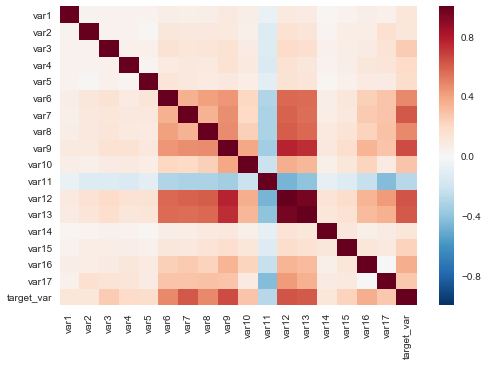

In [20]:
sb.heatmap(data.corr())  
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


###Predicting the Test set results

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [22]:
###Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

classifier.score(X_test,y_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.99      0.90      7728
          1       0.45      0.04      0.08      1761

avg / total       0.75      0.81      0.74      9489



In [23]:
###statsmodel

import statsmodels.api as sm
import statsmodels.formula.api as smf

train, test = train_test_split(data, test_size = 0.25, random_state = 0)

model=smf.logit('target_var~var1+var2+var3+var4+var5+var6+var7+var8+var9+var10+var11',data=train)
result=model.fit()
print(result.summary2())


         Current function value: 0.102407
         Iterations: 35
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.792    
Dependent Variable: target_var       AIC:              5854.2248
Date:               2019-01-16 23:08 BIC:              5953.3024
No. Observations:   28466            Log-Likelihood:   -2915.1  
Df Model:           11               LL-Null:          -14024.  
Df Residuals:       28454            LLR p-value:      0.0000   
Converged:          0.0000           Scale:            1.0000   
No. Iterations:     35.0000                                     
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Intercept   -6.8640    0.1039  -66.0834  0.0000  -7.0676  -6.6604
var1         1.0928    0.1301    8.4011  0.0000   0.8379   1.3478
var2         0.2711    0.0571    4.7523  0.0

C:\Users\Michael\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [24]:
pred=result.predict(test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[7635,   93],
       [1684,   77]])